# Breast Cancer
![](bc.jpg)

In [8]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors
from pandas.plotting import scatter_matrix
from scipy.stats import gaussian_kde
# from pandas.tools.plotting import parallel_cordinates
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn import manifold
from mpl_toolkits.mplot3d import Axes3D

matplotlib.style.use('ggplot')

In [9]:
# from sklearn.datasets import load_cancer
import sklearn

#  Data Set Information:

In [10]:


# There are 10 predictors, all quantitative, and a binary dependent variable, indicating the presence or absence of breast cancer. 
# The predictors are anthropometric data and parameters which can be gathered in routine blood analysis. 
# Prediction models based on these predictors, if accurate, can potentially be used as a biomarker of breast cancer.


# Attribute Information:

# Quantitative Attributes: 
# Age (years) 
# BMI (kg/m2) 
# Glucose (mg/dL) 
# Insulin (µU/mL) 
# HOMA 
# Leptin (ng/mL) 
# Adiponectin (µg/mL) 
# Resistin (ng/mL) 
# MCP-1(pg/dL) 

# Labels: 
# 1=Healthy controls 
# 2=Patients

In [11]:
pd.read_csv("cans.csv")

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1
5,49,22.854458,92,3.226,0.732087,6.8317,13.679750,10.31760,530.410,1
6,89,22.700000,77,4.690,0.890787,6.9640,5.589865,12.93610,1256.083,1
7,76,23.800000,118,6.470,1.883201,4.3110,13.251320,5.10420,280.694,1
8,73,22.000000,97,3.350,0.801543,4.4700,10.358725,6.28445,136.855,1
9,75,23.000000,83,4.952,1.013839,17.1270,11.578990,7.09130,318.302,1


# checking if there are any missing values to deal with

In [12]:
df =pd.read_csv("cans.csv")
def num_missing(x):
    return sum(x.isnull())

print ("missing values per column:")
print (df.apply(num_missing, axis=0))

missing values per column:
Age               0
BMI               0
Glucose           0
Insulin           0
HOMA              0
Leptin            0
Adiponectin       0
Resistin          0
MCP.1             0
Classification    0
dtype: int64


In [96]:
#checking for null values(NaN)
df.isnull().any()

Age               False
BMI               False
Glucose           False
Insulin           False
HOMA              False
Leptin            False
Adiponectin       False
Resistin          False
MCP.1             False
Classification    False
dtype: bool

In [13]:
print(df.dtypes)

Age                 int64
BMI               float64
Glucose             int64
Insulin           float64
HOMA              float64
Leptin            float64
Adiponectin       float64
Resistin          float64
MCP.1             float64
Classification      int64
dtype: object


# data exploration visualization

2    64
1    52
Name: Classification, dtype: int64


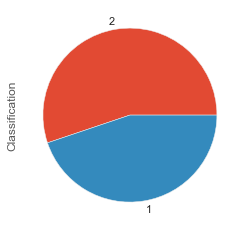

In [14]:
df['Classification'].value_counts().plot(kind='pie')
print(df['Classification'].value_counts())
plt.show ()

####  For scatter plotting, we like to run a matrix function for all features where we can understand and collect some insights. Furthermore, we marked the two classes in different colors. To do so, we utilized a great function from seaborn library:

C:\Users\Mikey\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Mikey\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


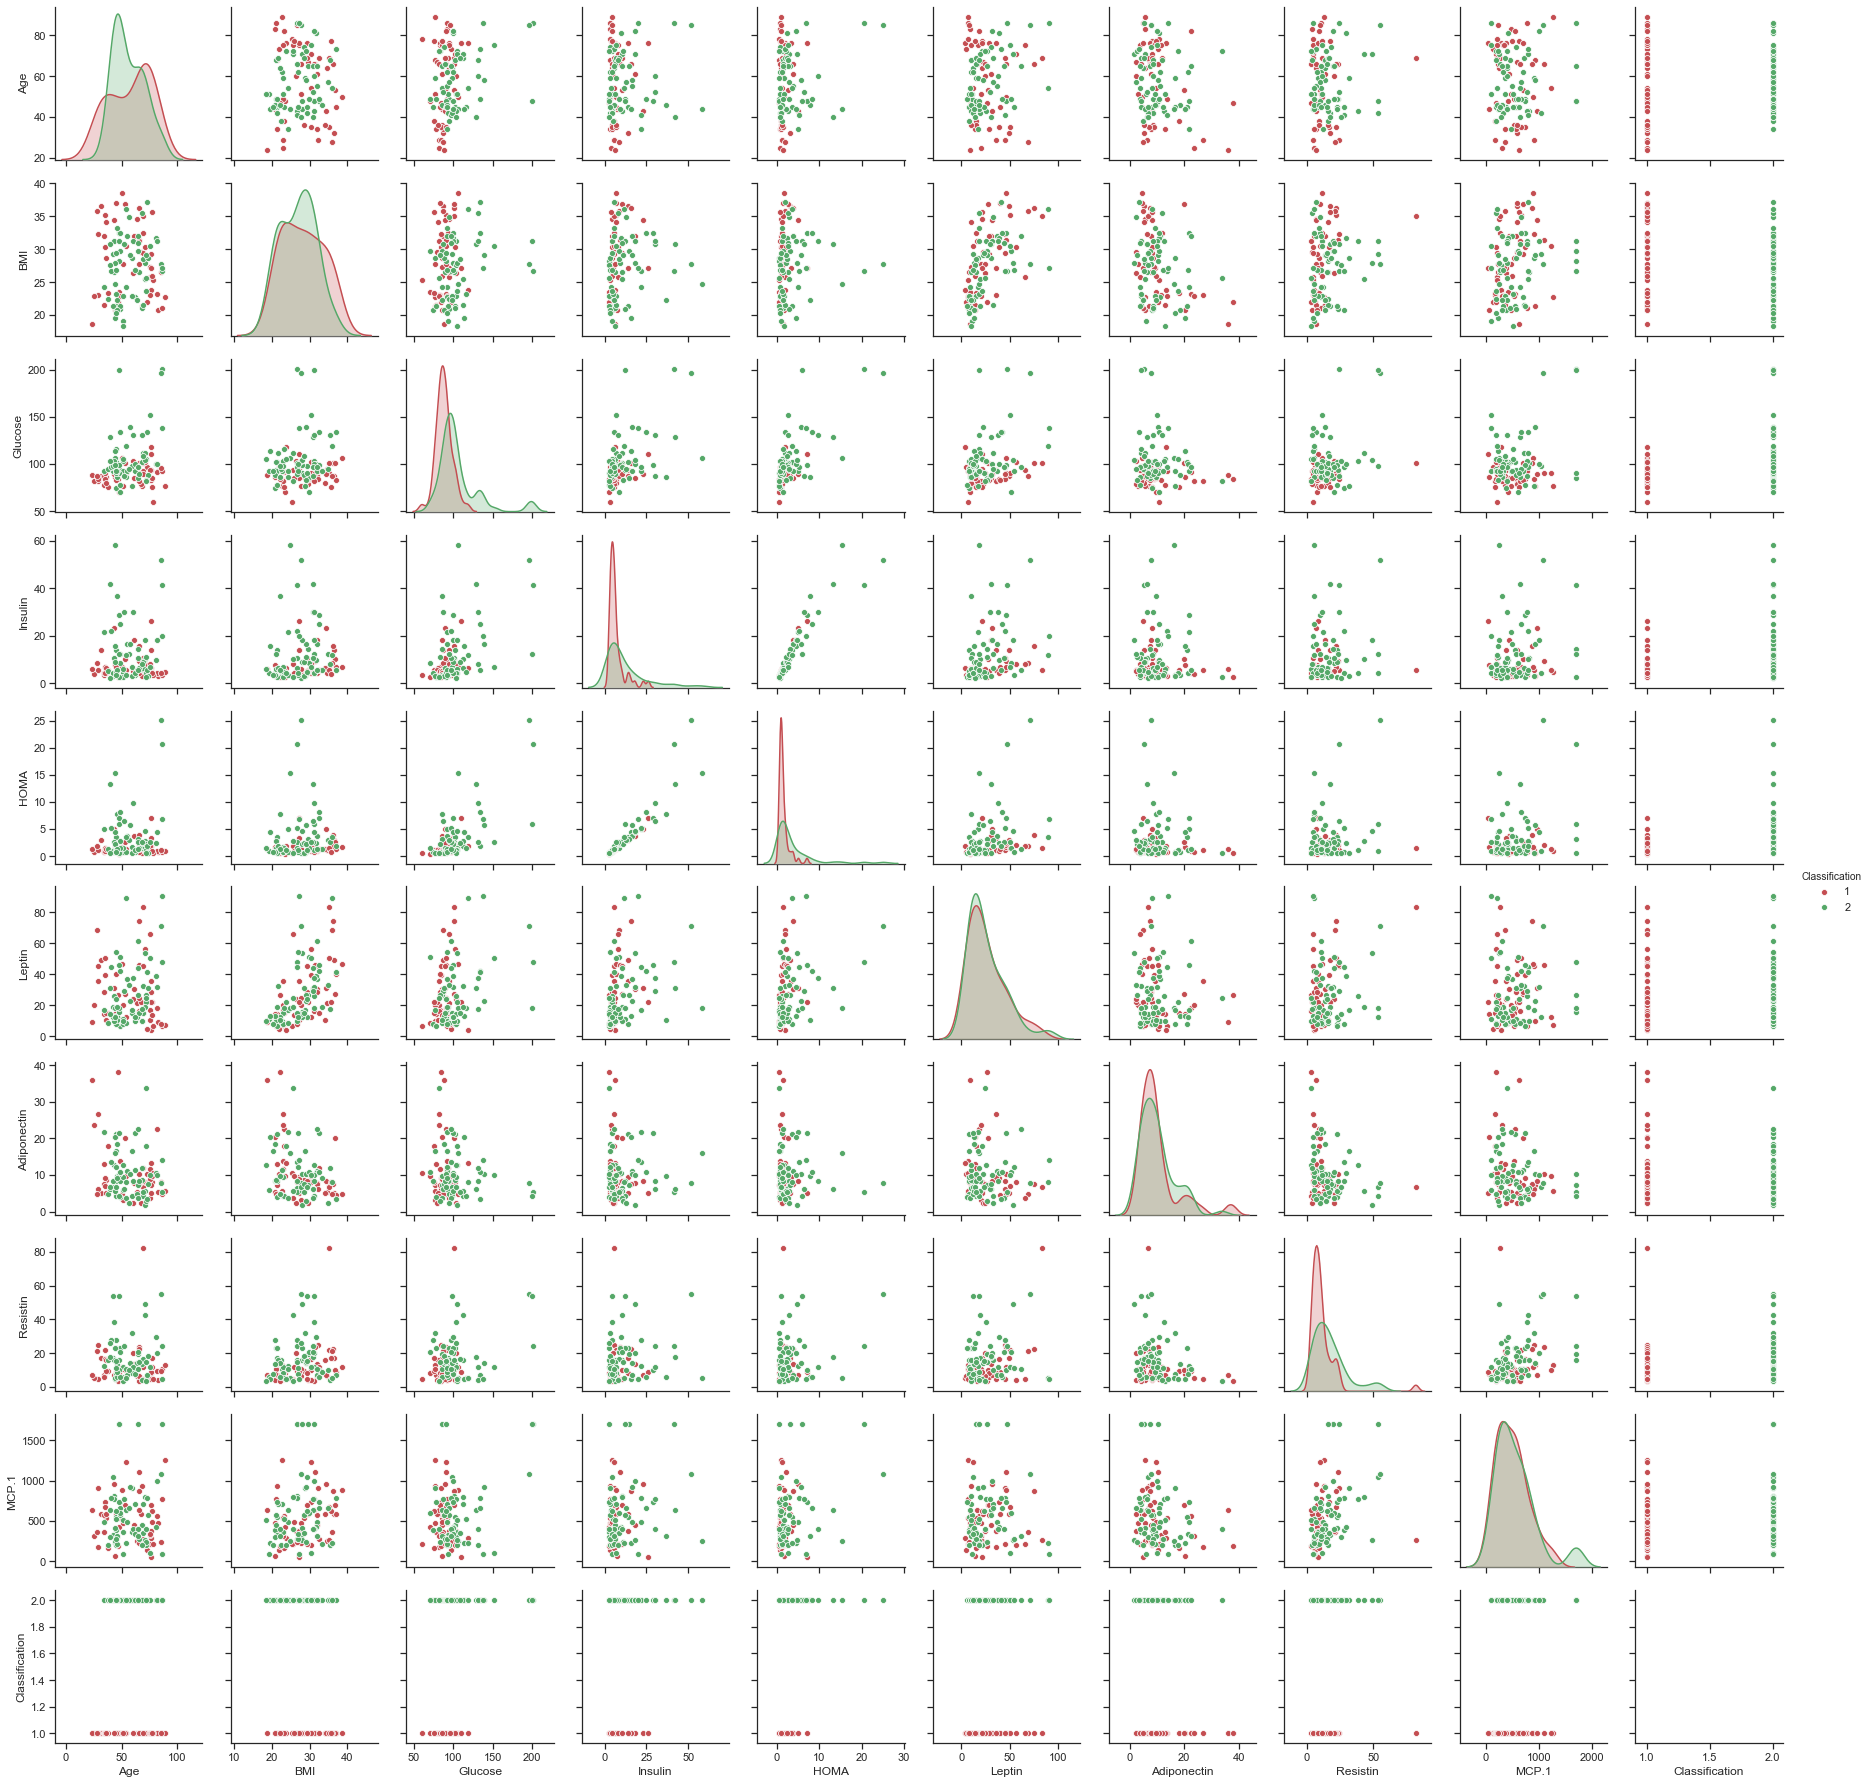

In [15]:
import seaborn as sns
sns.set(style="ticks")
sns.pairplot(df, palette = ('r','g'), hue="Classification")
plt.show()

### The above shows the relationship between the various labels; example (classification vs.age). This could be summarized using correlation metrics as shown below

In [28]:
# dropping the target column to analyse only the input values
#we assigned the features columns into X, and the label column 'Classification' into y:
y = df['Classification'].copy()
X = df.drop('Classification', axis=1)

In [49]:
# feature columns become
X.head(4)

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220


In [50]:
# classification column becomes
y.head(4)

0    1
1    1
2    1
3    1
Name: Classification, dtype: int64

In [33]:
# correlation between the input data
X.corr()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
Age,1.000000,0.008530,0.230106,0.032495,0.127033,0.102626,-0.219813,0.002742,0.013462
BMI,0.008530,1.000000,0.138845,0.145295,0.114480,0.569593,-0.302735,0.195350,0.224038
Glucose,0.230106,0.138845,1.000000,0.504653,0.696212,0.305080,-0.122121,0.291327,0.264879
Insulin,0.032495,0.145295,0.504653,1.000000,0.932198,0.301462,-0.031296,0.146731,0.174356
HOMA,0.127033,0.114480,0.696212,0.932198,1.000000,0.327210,-0.056337,0.231101,0.259529
Leptin,0.102626,0.569593,0.305080,0.301462,0.327210,1.000000,-0.095389,0.256234,0.014009
Adiponectin,-0.219813,-0.302735,-0.122121,-0.031296,-0.056337,-0.095389,1.000000,-0.252363,-0.200694
Resistin,0.002742,0.195350,0.291327,0.146731,0.231101,0.256234,-0.252363,1.000000,0.366474
MCP.1,0.013462,0.224038,0.264879,0.174356,0.259529,0.014009,-0.200694,0.366474,1.000000


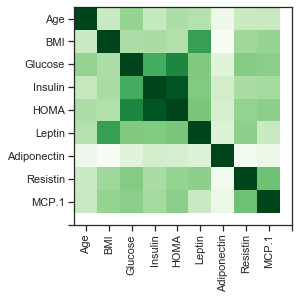

In [43]:
plt.imshow(X.corr(), cmap=plt.cm.Greens, interpolation='nearest')

tick_marks = [i for i in range(len(X.iloc[0:10]))] #iloc is indexing to exclude Classification column
plt.xticks(tick_marks, X.iloc[:,0:10],rotation='vertical')
plt.yticks(tick_marks, X.iloc[:,0:10])
           
plt.show()           

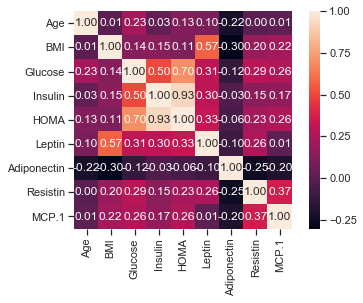

In [46]:
# %matplotlib inline
import seaborn as sns
sns.heatmap(X.corr(),cbar = True, annot = True, square = True, fmt='.2f')

# Data transformation

In [68]:
# #we assigned the features columns into X, and the label column 'Clasification' into Y:
# x = df.iloc[:,1:]
# y = df['Classification'].copy()
# x

In [76]:
#calculating the median for BMI
median_bmi = X['BMI'].median()
X['BMI'] = X['BMI'].replace(to_replace=0, value=median_bmi)

In [77]:
#calculating the median for Glucose
median_gl = X['Glucose'].median()
X['Glucose'] = X['Glucose'].replace(to_replace=0, value=median_gl)

In [78]:
#calculating the median for Insulin
median_insu = X['Insulin'].median()
X['Insulin'] = X['Insulin'].replace(to_replace=0, value=median_insu)

In [80]:
#calculating the median for Skin Thickness
median_lep = X['Leptin'].median()
X['Leptin'] = X['Leptin'].replace(to_replace=0, value=median_lep)

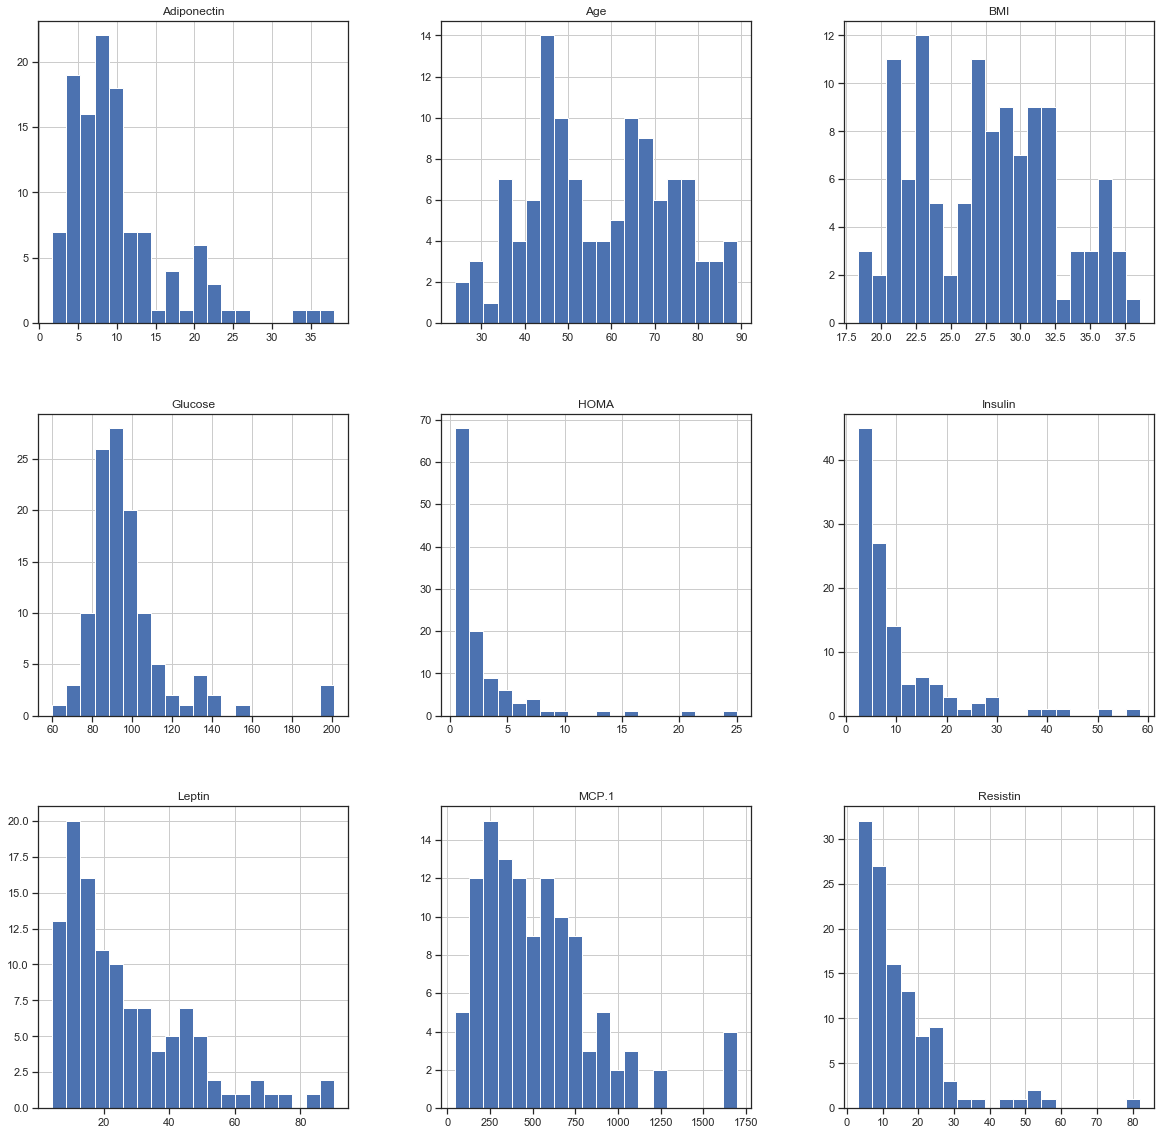

In [81]:
#graphing data after data cleaning
X.hist(bins=20, figsize=(20,20))
plt.show()

In [82]:
# y = df['Classification'].copy()
# X = df.drop('Classification', axis=1)
# X.head()

In [83]:
# analysing the feature columns
X.describe()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,57.301724,27.582111,97.793103,10.012086,2.694988,26.615080,10.180874,14.725966,534.647000
std,16.112766,5.020136,22.525162,10.067768,3.642043,19.183294,6.843341,12.390646,345.912663
min,24.000000,18.370000,60.000000,2.432000,0.467409,4.311000,1.656020,3.210000,45.843000
25%,45.000000,22.973205,85.750000,4.359250,0.917966,12.313675,5.474282,6.881763,269.978250
50%,56.000000,27.662416,92.000000,5.924500,1.380939,20.271000,8.352692,10.827740,471.322500
75%,71.000000,31.241442,102.000000,11.189250,2.857787,37.378300,11.815970,17.755207,700.085000
max,89.000000,38.578759,201.000000,58.460000,25.050342,90.280000,38.040000,82.100000,1698.440000


In [118]:
# x = df.iloc[:,1:]

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification


In [100]:
#applying a scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [332]:
scaled_X = pd.DataFrame(data = X_scaled, columns=['Age','BMI','Glucose','Insulin','HOMA','Leptin','Adiponectin','Resistin','MCP.1])
scaled_X.head(11)

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
0,0.369231,0.253850,0.070922,0.004908,0.000000,0.052299,0.221152,0.060665,0.224659
1,0.907692,0.114826,0.226950,0.012190,0.009742,0.052726,0.103707,0.010826,0.255926
2,0.892308,0.235278,0.219858,0.036874,0.022058,0.158526,0.571021,0.076906,0.307912
3,0.676923,0.148328,0.120567,0.014171,0.005911,0.064811,0.151538,0.121131,0.533934
4,0.953846,0.135640,0.226950,0.019936,0.013748,0.027782,0.086940,0.093375,0.440565
5,0.384615,0.221907,0.226950,0.014171,0.010767,0.029321,0.330468,0.090095,0.293215
6,1.000000,0.214264,0.120567,0.040301,0.017222,0.030860,0.108120,0.123287,0.732326
7,0.800000,0.268695,0.411348,0.072071,0.057593,0.000000,0.318692,0.024011,0.142110
8,0.753846,0.179625,0.262411,0.016385,0.013592,0.001850,0.239191,0.038971,0.055072
9,0.784615,0.229109,0.163121,0.044978,0.022228,0.149077,0.272729,0.049199,0.164867


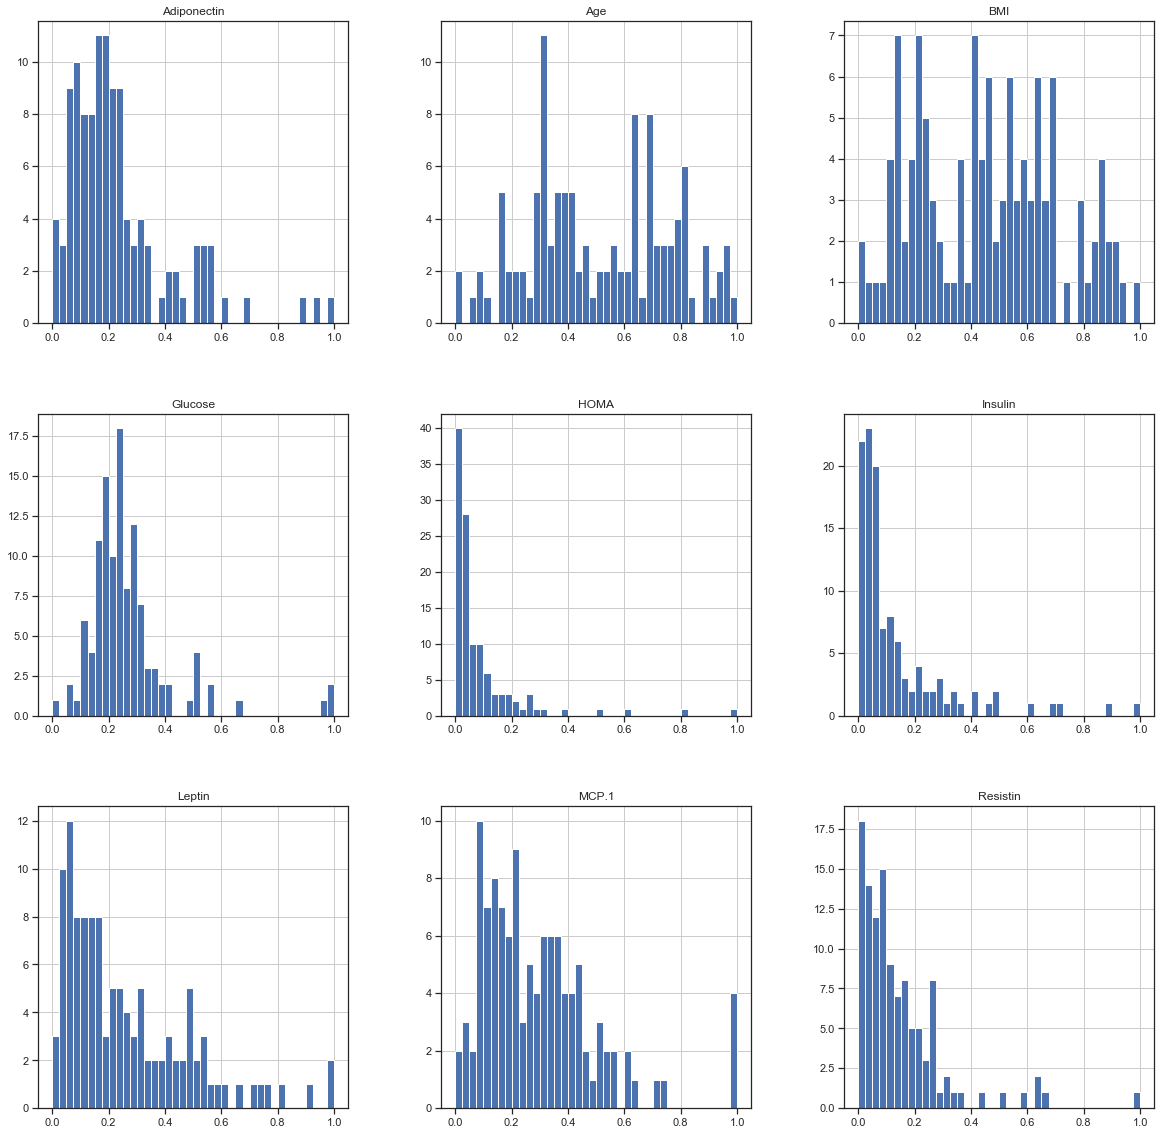

In [340]:
#graphing data after scaling
scaled_X.hist(bins=40, figsize=(20,20))
plt.show()

# Implementing Algorithms


In [124]:
#import all algorithms needed
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor

In [125]:
#model selection would help us test multiple algorithms on the same dataset.
from sklearn import model_selection 

In [126]:
#array of models
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('SVC', SVC()))
models.append(('LSVC', LinearSVC()))
models.append(('RFC', RandomForestClassifier()))
models.append(('DTR', DecisionTreeRegressor()))

In [127]:
print(models)

[('LR', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)), ('KNN', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')), ('GNB', GaussianNB(priors=None, var_smoothing=1e-09)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)), ('LSVC', LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_c

In [128]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [83]:
names=[]
results=[]

# Every algorithm is tested and results are
# collected and printed
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=7)
    cv_results = model_selection.cross_val_score(model, X_scaled, y, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.347727 (0.318857)
KNN: 0.458333 (0.262962)
GNB: 0.547727 (0.261820)
SVC: 0.193182 (0.273426)
LSVC: 0.456818 (0.269681)
RFC: 0.509091 (0.166108)
DTR: 0.563636 (0.185481)


# Train test split and algorithms

In [294]:
# We split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)
# 40% of the data is to be used for testing and the remaining for training

In [341]:
# trained data
X_train

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
100,74,28.650138,88,3.012,0.653805,31.1233,7.652220,18.35574,572.401
15,44,20.760000,86,7.553,1.600000,14.0900,20.320000,7.64000,63.610
85,65,29.666548,85,14.649,3.071407,26.5166,7.282870,19.46324,1698.440
91,82,31.217482,100,18.077,4.458993,31.6453,9.923650,19.94687,994.316
68,46,20.830000,88,3.420,0.742368,12.8700,18.550000,13.56000,301.210
51,77,25.900000,85,4.580,0.960273,13.7400,9.753260,11.77400,488.829
18,64,34.529723,95,4.427,1.037394,21.2117,5.462620,6.70188,252.449
107,46,33.180000,92,5.750,1.304867,18.6900,9.160000,8.89000,209.190
7,76,23.800000,118,6.470,1.883201,4.3110,13.251320,5.10420,280.694
78,86,26.666667,201,41.611,20.630734,47.6470,5.357135,24.37010,1698.440


In [342]:
# test data
X_test

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
13,24,18.670000,88,6.107,1.330000,8.8800,36.060000,6.85000,632.220
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697
25,45,37.035608,83,6.760,1.383997,39.9802,4.617125,8.70448,586.173
16,47,22.030000,84,2.869,0.590000,26.6500,38.040000,3.32000,191.720
19,32,36.512637,87,14.026,3.009980,49.3727,5.100000,17.10223,588.460
79,41,26.672763,97,22.033,5.271762,44.7059,13.494865,27.83250,783.796
5,49,22.854458,92,3.226,0.732087,6.8317,13.679750,10.31760,530.410
24,54,30.483158,90,5.537,1.229214,12.3310,9.731380,10.19299,1227.910
41,76,27.200000,94,14.070,3.262364,35.8910,9.346630,8.41560,377.227
20,36,28.576676,86,4.345,0.921719,15.1248,8.600000,9.15390,534.224


# Prediction

In [297]:
# trained classification values
y_train.head()

100    2
15     1
85     2
91     2
68     2
Name: Classification, dtype: int64

In [298]:
# test classification values
y_test.head()

13    1
2     1
25    1
16    1
19    1
Name: Classification, dtype: int64

## We print the shapes of the new objects to see if the rows of the and columns are corresponding

In [299]:
# The shapes of the new X objects
print(X_train.shape)
print(X_test.shape)

(69, 9)
(47, 9)


In [300]:
# print the shapes of the new y objects
print(y_train.shape)
print(y_test.shape)

(69,)
(47,)


In [301]:
#we train the model on the training set
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [302]:
# we make predictions on the testing set
y_pred = logreg.predict(X_test)

# compare actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred),)

0.7446808510638298


In [303]:
#  the default k value is 5
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.5957446808510638


In [304]:
#we try K=1 through K=25 and record testing accuracy to find the best k value
k_range = list(range(1, 26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    
print(scores)

[0.6170212765957447, 0.48936170212765956, 0.48936170212765956, 0.48936170212765956, 0.5957446808510638, 0.5319148936170213, 0.6170212765957447, 0.5957446808510638, 0.5957446808510638, 0.5319148936170213, 0.48936170212765956, 0.46808510638297873, 0.5319148936170213, 0.5106382978723404, 0.5531914893617021, 0.48936170212765956, 0.5319148936170213, 0.5106382978723404, 0.5319148936170213, 0.5319148936170213, 0.5319148936170213, 0.5319148936170213, 0.5319148936170213, 0.48936170212765956, 0.5106382978723404]


In [305]:
# the best k value was k=7 with a poor acuracy

In [306]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.6170212765957447


# we use cross validation 

In [307]:
from sklearn.model_selection import cross_val_score

In [308]:
# 10-fold cross-validation with K=11 for KNN (the n_neighbors parameter)
knn = KNeighborsClassifier(n_neighbors=11)
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(scores)

[0.46153846 0.53846154 0.5        0.58333333 0.63636364 0.45454545
 0.72727273 0.36363636 0.18181818 0.63636364]


In [309]:
print(scores.mean()) 

0.5083333333333334


In [310]:
k_range = list(range(1, 31))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.5955710955710958, 0.6067016317016316, 0.5097319347319347, 0.4669580419580419, 0.4851398601398601, 0.5082167832167832, 0.48234265734265735, 0.486013986013986, 0.48234265734265735, 0.509090909090909, 0.5083333333333334, 0.4719696969696969, 0.49708624708624705, 0.49015151515151506, 0.4824592074592074, 0.4817016317016317, 0.5348484848484849, 0.5348484848484848, 0.5097319347319347, 0.5125291375291375, 0.5195804195804195, 0.49988344988344985, 0.518065268065268, 0.5430652680652679, 0.5361305361305361, 0.5626456876456876, 0.5376456876456877, 0.5641608391608391, 0.5125291375291374, 0.48047785547785543]


In [311]:
rfc=RandomForestClassifier(random_state=4)

In [312]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=4, verbose=0,
                       warm_start=False)

In [313]:
y_pred = rfc.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))
# by default random forest classifier has random_state=none which kept changing 
# so we tried random_state=4 and got this value 0.7872340425531915

0.7872340425531915


In [314]:
# We ran a loop print the highest accuracy for random_state values from 1 to 41 
rnd_range = list(range(1, 41))
scores = []
for k in rnd_range:
    rfc=RandomForestClassifier(random_state=k)
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
print(scores)

[0.723404255319149, 0.7446808510638298, 0.723404255319149, 0.7872340425531915, 0.723404255319149, 0.7446808510638298, 0.7659574468085106, 0.8297872340425532, 0.7872340425531915, 0.7021276595744681, 0.8297872340425532, 0.8085106382978723, 0.7872340425531915, 0.6595744680851063, 0.8297872340425532, 0.7659574468085106, 0.7446808510638298, 0.7021276595744681, 0.7872340425531915, 0.7021276595744681, 0.7659574468085106, 0.6595744680851063, 0.6808510638297872, 0.8297872340425532, 0.7021276595744681, 0.7872340425531915, 0.7659574468085106, 0.723404255319149, 0.8085106382978723, 0.7659574468085106, 0.7659574468085106, 0.7872340425531915, 0.723404255319149, 0.7446808510638298, 0.7872340425531915, 0.7446808510638298, 0.7659574468085106, 0.7446808510638298, 0.7659574468085106, 0.7872340425531915]


In [315]:
# same loop to print random_state value attached
rnd_range = list(range(1, 25))
scores = []
for k in rnd_range:
    rfc=RandomForestClassifier(random_state=k)
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    acc= metrics.accuracy_score(y_test, y_pred)
    print(k,acc)

1 0.723404255319149
2 0.7446808510638298
3 0.723404255319149
4 0.7872340425531915
5 0.723404255319149
6 0.7446808510638298
7 0.7659574468085106
8 0.8297872340425532
9 0.7872340425531915
10 0.7021276595744681
11 0.8297872340425532
12 0.8085106382978723
13 0.7872340425531915
14 0.6595744680851063
15 0.8297872340425532
16 0.7659574468085106
17 0.7446808510638298
18 0.7021276595744681
19 0.7872340425531915
20 0.7021276595744681
21 0.7659574468085106
22 0.6595744680851063
23 0.6808510638297872
24 0.8297872340425532


In [ ]:
# we use random_state=8 as it gives highest accuracy


# Actual prediction with a dummy data

In [328]:
new=pd.DataFrame([[56,23,50,5,0.4,8,9,2,6],[34,78,7,0.9,6,5,7,4,8]])

In [330]:
print(rfc.predict(new))


[1 1]
